In [2]:
! pip install underthesea

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 49.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
from nltk.tokenize import sent_tokenize
from underthesea import text_normalize
from underthesea import word_tokenize
from underthesea import classify
from underthesea import sentiment
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Huy_Total_data.csv",).drop(["Time", "Rating", "Id"], axis=1)
print(data.head())

                                         Review Text sentiment
0  Came here once to do endoscopy. Terrible servi...  Negative
1  Bệnh viện khá hiện đại. Vị trí thuận lợi đến v...   Neutral
2  Bệnh viện Đại học Y Dược là bệnh viện đa khoa,...  Positive
3  Lần đầu tiên đưa ba đi khám tổng quát tại Bệnh...  Positive
4  26/05/2023. 1 ngày trải nghiệm tại bv Đại Học ...  Positive


In [6]:
data["sentiment"] = data["sentiment"].replace({"Negative": 0, "Neutral": 1, "Positive": 2})
data

,Review Text,sentiment
0,Came here once to do endoscopy. Terrible servi...,0
1,Bệnh viện khá hiện đại. Vị trí thuận lợi đến v...,1
2,"Bệnh viện Đại học Y Dược là bệnh viện đa khoa,...",2
3,Lần đầu tiên đưa ba đi khám tổng quát tại Bệnh...,2
4,26/05/2023. 1 ngày trải nghiệm tại bv Đại Học ...,2
...,...,...
10290,đôi ngu y bác si o day rat nhiệt tinh,2
10291,Tôi được người bạn giới thiệu và khám tại Phòn...,2
10292,Thực tình nhiều nơi tôi đi khám vấn đề chờ đợi...,1
10293,"Tôi đã khám tại Phòng khám Vigor 3 năm, tôi th...",2


In [7]:
data.shape

(10295, 2)

In [11]:
texts = data['Review Text']

In [12]:
import numpy as np

text_lens = []
for t in texts.values:
    if isinstance(t, str):
        text_len = len(t.split())
        text_lens.append(text_len)

len_mean = np.mean(text_lens)

In [13]:
len_mean

45.23895094706168

In [15]:
stopwords_vn = [
    "bị", "bởi", "cả", "các", "cái", "cần", "càng", "chỉ", "chiếc", "cho", "chứ",
    "chưa", "chuyện", "có", "có_thể", "cứ", "của", "cùng", "cũng", "đã", "đang",
    "đây", "để", "đến_nỗi", "đều", "điều", "do", "đó", "được", "dưới", "gì", "khi",
    "không", "là", "lại", "lên", "lúc", "mà", "mỗi", "một_cách", "này", "nên", "nếu",
    "ngay", "nhiều", "như", "nhưng", "những", "nơi", "nữa", "phải", "qua", "ra", "rằng",
    "rằng", "rất", "rất", "rồi", "sau", "sẽ", "so", "sự", "tại", "theo", "thì", "trên",
    "trước", "từ", "từng", "và", "vẫn", "vào", "vậy", "vì", "việc", "với", "vừa"
    # Add more stopwords as needed
]

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
stuff_to_be_removed = stopwords.words('english') + list(punctuation) + stopwords_vn
stemmer = LancasterStemmer()
corpus = data['Review Text'].tolist()
print(len(corpus))
print(corpus[0])


10295
Came here once to do endoscopy. Terrible service and facilities. No proper queing at all. So many people took queing tickets in advance and then selling to the patients with a higher price. So unethical! The staffs and the hospital know but they do nothing about it. This problem has been going on for years. I saw many staffs just stood there and played their phone. Since there are too many patients, the staffs, the nurses and the doctors will only spend a very short time on each patient. The whole process took me two days and I only saw the doctors for 15 minutes and about 15 mins more for the endoscopy itself. The doctors' quality are ok but other than that, there is nothing good about this hospital. There are some private hospitals in the city which are much better than this one.

chật chội bon chen khủng khiếp. lấy số thứ tự cũng như không. hoàn toàn không có khái niệm xếp hàng. rất nhiều cá nhân lấy số thứ tự trước rồi bán lại như vé chợ đen, ko mua thì phải chờ đến ngày mai 

In [19]:
word_replacements = {
    # Group: Numbers and simple replacements
    "1": "i",
    "3": "e",
    "4": "a",
    "5": "s",
    "7": "t",
    "0": "o",
    "@": "a",
    "/\\": "a",
    "/-\\": "a",
    "*": "a",
    "ä": "a",
    "á": "a",
    "à": "a",
    "â": "a",
    "a^": "a",
    "ã": "a",
    "å": "a",
    "ą": "a",
    "ª": "a",
    "∀": "a",
    "∧": "a",
    "α": "a",

    # Group: Letters and their replacements
    "8": "b",
    "|3": "b",
    "13": "b",
    "ß": "b",
    "þ": "b",
    "v": "b",
    "ć": "c",
    "č": "c",
    "ç": "c",
    "©": "c",
    "σ": "c",
    "(": "c",
    "¢": "c",
    "<": "c",
    "[": "c",
    "©": "c",
    "[)": "d",
    "|>": "d",
    "|)": "d",
    "|]": "d",
    "3": "e",
    "€": "e",
    "є": "e",
    "[-": "e",
    "|=": "f",
    "ƒ": "f",
    "/=": "f",
    "6": "g",
    "(_+": "g",
    "#": "h",
    "/-/": "h",
    "[-]": "h",
    "]-[": "h",
    ")-(": "h",
    "(-)": "h",
    ":-:": "h",
    "|~|": "h",
    "|-|": "h",
    "]~[": "h",
    "}{" : "h",

    # Group: More letters and their replacements
    "1": "i",
    '!': "i",
    "|": "i",
    "][" : "i",
    "]": "i",
    ":" : "i",
    "_|": "j",
    "_/": "j",
    "¿": "j",
    "(/": "j",
    "ʝ": "j",
    ";": "j",
    "X": "k",
    "|<": "k",
    "|{": "k",
    "ɮ": "k",
    "£": "l",
    "1_": "l",
    "ℓ": "l",
    "|_": "l",
    "[_": "l",
    "|V|": "m",
    "|\\/|": "m",
    "/\\/\\": "m",
    "/V\\": "m",
    "|V": "n",
    "|\\|": "n",
    "/\\/": "n",
    "[\\]": "n",
    "/V": "n",

    # Group: More replacements
    "[]": "o",
    "0": "o",
    "()": "o",
    "°": "o",
    "|*": "p",
    "|o": "p",
    "|º": "p",
    "|°": "p",
    "/*": "p",
    "¶": "q",
    "(_,)": "q",
    "()_": "q",
    "0_": "q",
    "°|": "q",
    "<|": "q",
    "®": "r",
    "2": "r",
    "|?": "r",
    "/2": "r",
    "®": "r",
    "Я": "r",
    "|2": "r",
    "§": "s",
    "5": "s",
    "$": "s",
    "_/¯": "s",
    "7": "t",
    "†": "t",
    "¯|¯": "t",
    "(_)": "u",
    "|_|": "u",
    "L|": "u",
    "µ": "u",
    "\/": "v",
    "|/": "v",
    "\/\/": "w",
    "vv": "w",
    "\/": "w",
    "\^/": "w",
    "\V/": "w",
    "\|/": "w",
    "\_|_/": "w",
    "\_:_/": "w",
    "><": "x",
    "}{" : "x",
    "×": "x",
    ")(": "x",
    "`/": "y",
    "φ": "y",
    "¥": "y",
    "\/": "y",
    "≥": "z",
    "7_": "z",
    ">_": "z",

    # Group: Common abbreviations and their expansions
    "youre": "you are",
    "im": "I am",
    "dont": "do not",
    "cant": "cannot",
    "wont": "will not",
    "ive": "I have",
    "id": "I would",
    "theyre": "they are",
    "theres": "there is",

    # Group: Common Vietnamese shortcuts and their expansions
    "ko": "không",
    "t": "tôi",
    "m": "mình",
    "mày": "em",
    "tao": "anh",
    "dc": "được",
    "hok": "không",
    "ngta": "người ta",
    'bsau': "bữa sau",
    "k": "không"
}

In [21]:
! pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.0 MB/s eta 0:00:00


In [24]:
def handle_emoji(string):
    emojis = demoji.findall(string)

    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])

    return string

In [26]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [27]:
final_corpus = []
final_corpus_joined = []

for i in data.index:
    text = data['Review Text'][i]
    if isinstance(text, str):
        text = re.sub('[^a-zA-Zàáảãạăắằẵặẳâấầẩẫậđèéẻẽẹêềếểễệìíỉĩịòóỏõọôốồổỗộơớờởỡợùúủũụưứừửữựỳýỷỹỵ]', ' ', text)
        text = text.lower()
        text = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", text)
        text = re.sub("(\\d|\\W)+", " ", text)
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'(http\S+)?(\w+\.)+\S+', r'', text)
        text = handle_emoji(text)  # Ensure 'text' is a string here
        text = uni.normalize('NFKD', text)  # Ensure 'text' is a string here
        text = text.split()
        lem = WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text if not word in stuff_to_be_removed]
        # Apply word replacements
        text = [word_replacements.get(word, word) for word in text]
        text1 = " ".join(text)
    else:
        # Handle non-string elements
        text1 = ""
    final_corpus.append(text)
    final_corpus_joined.append(text1)

In [28]:
num_elements = len(final_corpus)
print(num_elements)

10295


In [29]:
num_elements_2 = len(final_corpus_joined)
print(num_elements_2)

10295


In [30]:
data_cleaned = pd.DataFrame()
data_cleaned["Review Text"] = final_corpus_joined
data_cleaned["sentiment"] = data["sentiment"].values

In [31]:
data_eda = pd.DataFrame()
data_eda['Review Text'] = final_corpus
data_eda['sentiment'] = data['sentiment'].values
data_eda.head()

,Review Text,sentiment
0,"[came, endoscopy, terrible, service, facility,...",0
1,"[bệnh, viện, khá, hiện, đại, vị, trí...",1
2,"[bệnh, viện, ại, học, dược, là, bệ...",2
3,"[lần, đầu, tiên, đưa, ba, đi, khám, tô...",2
4,"[ngày, trải, nghiệm, tại, bv, ại, học, ...",2


In [32]:
Neutral = data_eda[data_eda['sentiment'] == 1]
Neutral_list = Neutral['Review Text'].tolist()
Negative = data_eda[data_eda['sentiment'] == 0]
Negative_list = Negative['Review Text'].tolist()
Positive = data_eda[data_eda['sentiment'] == 2]
Positive_list = Positive['Review Text'].tolist()

In [33]:
Positive_all = " ".join([word for sent in Positive_list if isinstance(sent, list) for word in sent])
Negative_all = " ".join([word for sent in Negative_list if isinstance(sent, list) for word in sent])
Neutral_all = " ".join([word for sent in Neutral_list if isinstance(sent, list) for word in sent])

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
xt = tfidf.fit_transform(data_cleaned['Review Text'])
y = data_cleaned['sentiment']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xt,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=123,
                                                    stratify = y)

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [38]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
accuracy_score(y_train,y_train_pred)*100

81.44120632158909

In [39]:
from sklearn.metrics import confusion_matrix

y_train_pred = lr.predict(X_train)
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)

print(confusion_matrix_train)

[[2107   12  360]
 [ 218   36  370]
 [ 312    8 3474]]


              precision    recall  f1-score   support

           0       0.80      0.85      0.82      2479
           1       0.64      0.06      0.11       624
           2       0.83      0.92      0.87      3794

    accuracy                           0.81      6897
   macro avg       0.76      0.61      0.60      6897
weighted avg       0.80      0.81      0.78      6897



<Axes: >

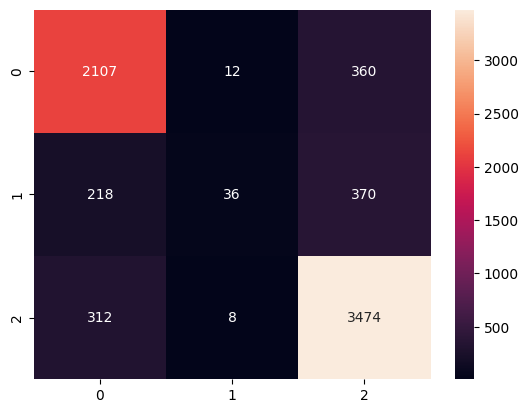

In [40]:
from sklearn.metrics import classification_report

y_train_pred = lr.predict(X_train)
classification_report_train = classification_report(y_train, y_train_pred)

print(classification_report_train)
sns.heatmap(confusion_matrix_train, annot=True, fmt='d')

In [41]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier().fit(X_train, y_train)
sgd_prediction = sgd.predict(X_test)
print(classification_report(y_test, sgd_prediction))


              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1222
           1       0.00      0.00      0.00       307
           2       0.80      0.89      0.84      1869

    accuracy                           0.78      3398
   macro avg       0.52      0.57      0.54      3398
weighted avg       0.71      0.78      0.74      3398



In [42]:
from sklearn.svm import SVC
svc = SVC(C=1000).fit(X_train, y_train)
svc_prediction = svc.predict(X_test)
print(classification_report(y_test, svc_prediction))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1222
           1       0.39      0.13      0.20       307
           2       0.84      0.89      0.87      1869

    accuracy                           0.80      3398
   macro avg       0.67      0.62      0.63      3398
weighted avg       0.78      0.80      0.79      3398

